<a href="https://colab.research.google.com/github/vishnushukl/-Bank-Marketing-Analysis/blob/main/Project_1_for_NN_classication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import tensorflow library

In [ ]:
import tensorflow as tf

In [ ]:
# load the data
mnist = tf.keras.datasets.mnist

In [ ]:
# load the data and split the data into training and testing
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

print('x_train shape:', x_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28)


In [ ]:
# build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# model = tf.keras.Sequential()
# model.add(tf.keras.Input(shape=(16,)))
# model.add(tf.keras.layers.Dense(8))

In [ ]:
# compile the model
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
# Train the model
r = model.fit(x_train, y_train, validation_data  = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2969 - accuracy: 0.9139 - val_loss: 0.1396 - val_accuracy: 0.9591
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1440 - accuracy: 0.9578 - val_loss: 0.0964 - val_accuracy: 0.9687
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1050 - accuracy: 0.9686 - val_loss: 0.0845 - val_accuracy: 0.9745
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0878 - accuracy: 0.9731 - val_loss: 0.0805 - val_accuracy: 0.9754
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0757 - accuracy: 0.9763 - val_loss: 0.0705 - val_accuracy: 0.9791
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0645 - accuracy: 0.9794 - val_loss: 0.0722 - val_accuracy: 0.9793
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0566 - accuracy: 0.9819 - val_loss: 0.0681 - val_accuracy:

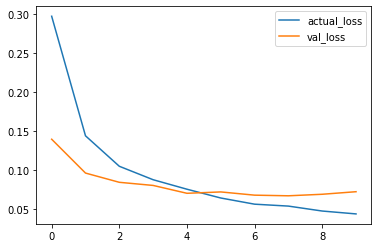

In [ ]:
# Plot loss per iterations
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'actual_loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

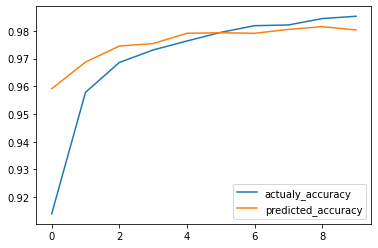

In [ ]:
# Plot the accuracy of both
plt.plot(r.history['accuracy'], label = 'actualy_accuracy')
plt.plot(r.history['val_accuracy'], label = 'predicted_accuracy')
plt.legend()

In [ ]:
# Evaluating the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0725 - accuracy: 0.9803
[0.07251997292041779, 0.9803000092506409]


In [ ]:
from sklearn.metrics import confusion_matrix

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
print(cm)

[[ 970    1    1    1    0    1    2    1    2    1]
 [   0 1125    3    1    0    0    1    0    5    0]
 [   2    2 1007    4    2    1    2    5    7    0]
 [   0    0    4  990    0    7    0    3    6    0]
 [   0    0    1    1  962    0    5    5    1    7]
 [   2    0    0    4    1  880    2    2    1    0]
 [   3    3    0    1    1   10  938    0    2    0]
 [   1    2    6    3    0    0    0 1012    2    2]
 [   5    0    3    3    4    9    0    3  946    1]
 [   0    3    0    4   10    7    1    9    2  973]]


Text(0.5, 1.0, 'True lable : 8, Predicted as : 5')

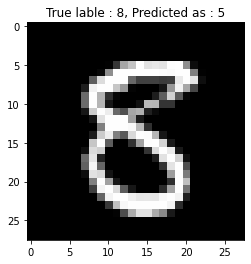

In [ ]:
# show some missclassfied example
import numpy as np

missclassified_idx = np.where( p_test != y_test)[0]
i = np.random.choice(missclassified_idx)
plt.imshow(x_test[i], cmap = 'gray')
plt.title(f"True lable : {y_test[i]}, Predicted as : {p_test[i]}")
# plt.title(f"True label : {y_test[i]}")
# plt.title(f"Predicted as : {p_test[i]}")

Text(0.5, 1.0, 'True lable : 9, Predicted as : 9')

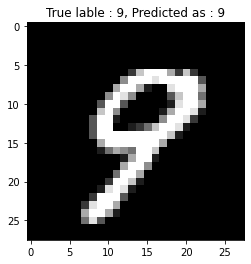

In [ ]:
# show some exact classfied example

exact_classified_idx = np.where( p_test == y_test)[0]
i = np.random.choice(exact_classified_idx)
plt.imshow(x_test[i], cmap = 'gray')
plt.title(f"True lable : {y_test[i]}, Predicted as : {p_test[i]}")
# plt.title(f"True label : {y_test[i]}")
# plt.title(f"Predicted as : {p_test[i]}")